Cost Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = [1, 2, 3]
y = [2.5, 3.5, 4.5]

hyp = [0.5, 3, 1.5]

In [3]:
# mutiply the original X values by the theta
# to produce hypothesis values for each X
def multiply_matrix(mat, theta):
    mutated = []
    for i in range(len(mat)):
        mutated.append(mat[i] * theta)

    return mutated

In [4]:
# calculate cost by looping each sample
# subtract hyp(x) from y
# square the result
# sum them all together
def calc_cost(m, X, y):
    total = 0
    for i in range(m):
        squared_error = (y[i] - X[i]) ** 2
        total += squared_error

    return total * (1 / (2*m))


In [5]:
for i in range(len(hyp)):
    hyp_values = multiply_matrix(x, hyp[i])

    print("Cost for ", hyp[i], " is ", calc_cost(len(x), y, hyp_values))

Cost for  0.5  is  3.208333333333333
Cost for  3  is  4.458333333333333
Cost for  1.5  is  0.20833333333333331


Gradient Descent

In [14]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    theta = [theta, 0]

    for _ in range(iterations):

        hypothesis = [theta[0] + theta[1] * x_i for x_i in X]

        error = [hypothesis[i] - y[i] for i in range(m)]

        gradient_0 = (1/m) * sum(error)  # Gradient for theta_0
        gradient_1 = (1/m) * sum([error[i] * X[i] for i in range(m)])  # Gradient for theta_1

        # Update parameters
        theta[0] = theta[0] - alpha * gradient_0
        theta[1] = theta[1] - alpha * gradient_1

        # Calculate cost (Mean Squared Error)
        cost = (1/(2*m)) * sum([(hypothesis[i] - y[i]) ** 2 for i in range(m)])
        cost_history.append(cost)

    return theta, cost_history


In [15]:
theta = 0.5  # Initial value for theta
alpha = 0.000001  # Learning rate
iterations = 1000000

theta, cost_history = gradient_descent(x, y, theta, alpha, iterations)

In [16]:
print("Optimized theta:", theta)
print("Final Cost:", cost_history[-1])

Optimized theta: [1.0817927416683304, 1.1783528270412225]
Final Cost: 0.012494471099754993


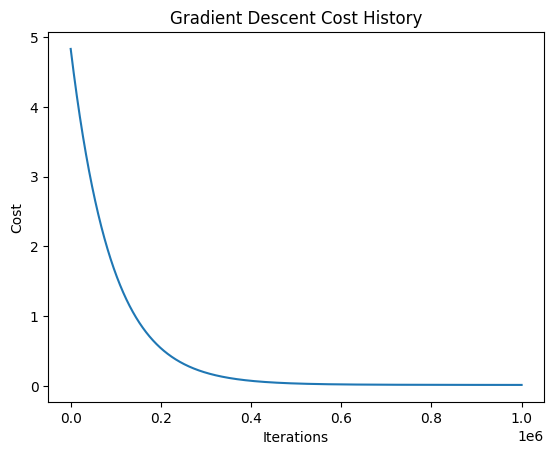

In [17]:
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Cost History')
plt.show()